In [42]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.6
  [780c37f4] Carlo v0.2.5
  [074ae576] CarloAnalysis v1.0.0-DEV `https://github.com/PatXue/CarloAnalysis.jl#main`
  [a93c6f00] DataFrames v1.8.0
  [e9467ef8] GLMakie v0.13.6
  [f67ccb44] HDF5 v0.17.2
  [033835bb] JLD2 v0.6.2
  [ebeed567] PeriodicArrays v0.1.0 `https://github.com/PatXue/PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.15


In [43]:
using CairoMakie
using Carlo.ResultTools
using CarloAnalysis
using DataFrames
using GLMakie
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [44]:
function generate_spins(jobname, task_no)
    fig = Figure(size=(800, 400))

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
        spins = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/spins")
        )
        spin_xs = map(v -> v[1], spins)
        spin_ys = map(v -> v[2], spins)
        spin_zs = map(v -> v[3], spins)
        Lx, Ly = size(spins)
        fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
        strength = vec(spin_zs)
        arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))

        ηs = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/etas")
        )
        η_xs = getindex.(ηs, 1)
        η_ys = getindex.(ηs, 2)
        η_zs = getindex.(ηs, 3)
        Lx, Ly = size(ηs)
        fig[1,2] = Axis(fig; title="ηs", backgroundcolor="black")
        strength = vec(η_zs)
        arrows2d!(1:Lx, 1:Ly, η_xs, η_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))
    end

    return fig
end

generate_spins (generic function with 1 method)

In [45]:
results = JobResult("../jobs", "stripe-anneal")

JobResult("../jobs", "stripe-anneal", 10×23 DataFrame
 Row │ ηz               T        init_T  etak_corrs                         _l ⋯
     │ Measurem…        Float64  Int64   Array…                             Me ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.02309±0.0001       0.5      10  Complex{Measurement{Float64}}[14…  0. ⋯
   2 │ 0.02336±0.00012      1.0      10  Complex{Measurement{Float64}}[15…  0.
   3 │ 0.02307±0.0001       1.5      10  Complex{Measurement{Float64}}[14…  0.
   4 │ 0.02334±0.00011      2.0      10  Complex{Measurement{Float64}}[15…  0.
   5 │ 0.0232±0.00014       2.5      10  Complex{Measurement{Float64}}[15…  0. ⋯
   6 │ 0.02321±0.00016      3.0      10  Complex{Measurement{Float64}}[14…  0.
   7 │ 0.022984±0.0001      3.5      10  Complex{Measurement{Float64}}[14…  0.
   8 │ 0.02311±0.00015      4.0      10  Complex{Measurement{Float64}}[14…  0.
   9 │ 0.02306±0.0001       4.5      10  Complex{Measurement{Float6

In [46]:
results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.000487±3.2e-5,0.000203±2.7e-5
2,0.00043572±7.0e-7,0.0001528±6.9e-6
3,0.0004459±7.6e-6,0.00018±1.8e-5
4,0.00043485±6.9e-7,0.0001417±3.3e-6
5,0.0004359±1.2e-6,0.0001464±5.5e-6
6,0.0004353±1.9e-6,0.000157±2.2e-5
7,0.0004371±1.7e-6,0.0001508±5.5e-6
8,0.0004362±1.4e-6,0.000143±4.5e-6
9,0.0004414±7.4e-6,0.000164±1.8e-5


In [47]:
spink_corrs = results[:spink_corrs] ./ 400^2

10-element Vector{Matrix{Measurements.Measurement{Float64}}}:
 [0.005189 ± 5.3e-5 0.005022 ± 2.7e-5 … 0.004544 ± 2.2e-5 0.005022 ± 2.7e-5; 0.005007 ± 1.2e-5 0.004964 ± 2.2e-5 … 0.0041 ± 2.4e-5 0.004687 ± 2.3e-5; … ; 0.004488 ± 1.7e-5 0.004149 ± 1.7e-5 … 0.004486 ± 1.3e-5 0.00468 ± 2.5e-5; 0.005007 ± 1.2e-5 0.004687 ± 2.3e-5 … 0.004665 ± 3.7e-5 0.004964 ± 2.2e-5]
 [0.005211 ± 3.4e-5 0.005022 ± 2.1e-5 … 0.004505 ± 1.8e-5 0.005022 ± 2.1e-5; 0.004995 ± 2.5e-5 0.004947 ± 2.0e-5 … 0.004111 ± 2.0e-5 0.004672 ± 2.9e-5; … ; 0.004538 ± 2.4e-5 0.004116 ± 2.2e-5 … 0.004527 ± 2.2e-5 0.004639 ± 2.2e-5; 0.004995 ± 2.5e-5 0.004672 ± 2.9e-5 … 0.004677 ± 1.8e-5 0.004947 ± 2.0e-5]
 [0.00512 ± 4.1e-5 0.004983 ± 2.6e-5 … 0.004496 ± 2.1e-5 0.004983 ± 2.6e-5; 0.004978 ± 2.5e-5 0.004946 ± 2.8e-5 … 0.0041 ± 2.3e-5 0.004637 ± 2.7e-5; … ; 0.004468 ± 2.7e-5 0.00411 ± 2.1e-5 … 0.004521 ± 1.9e-5 0.004626 ± 2.3e-5; 0.004978 ± 2.5e-5 0.004637 ± 2.7e-5 … 0.004631 ± 2.3e-5 0.004946 ± 2.8e-5]
 [0.005173 ± 5.1e-5 0.00493

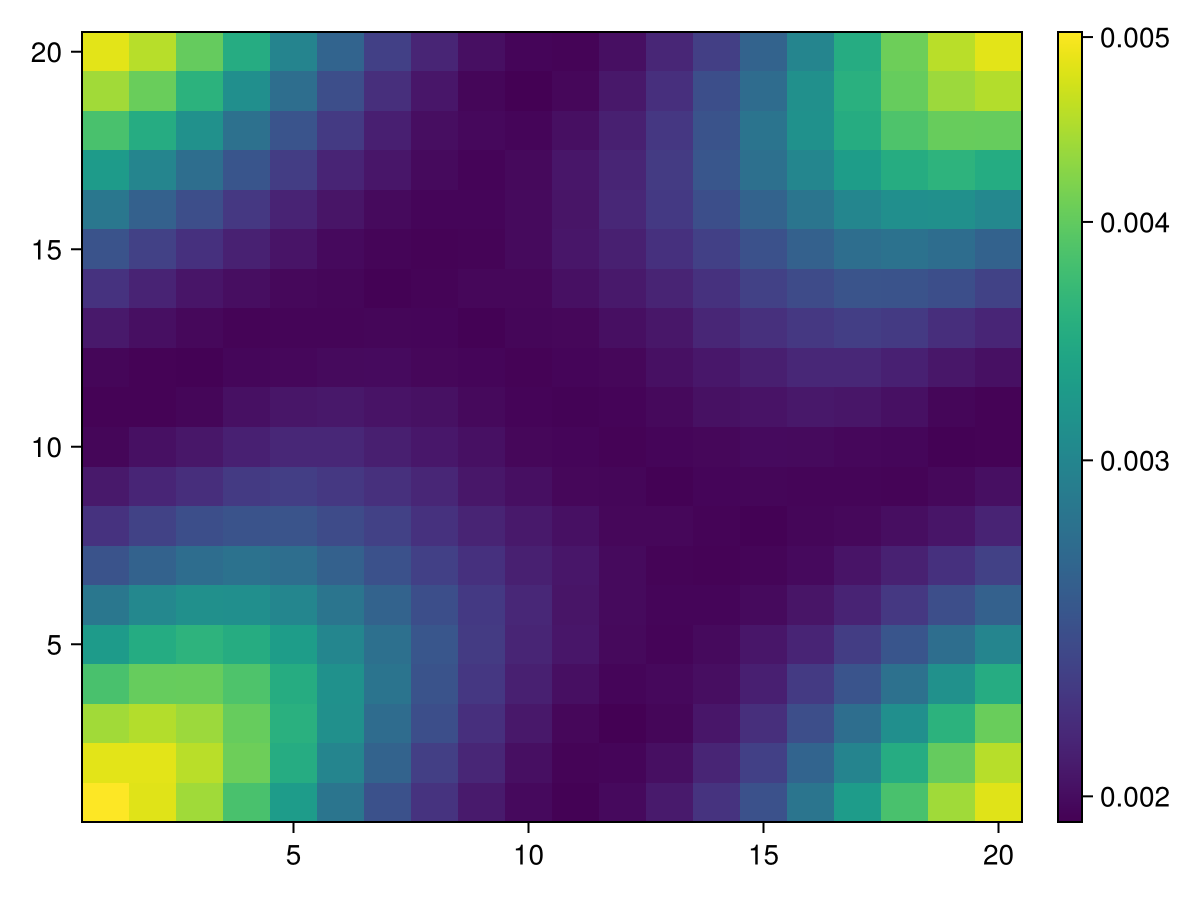

In [48]:
CairoMakie.activate!()
fig = Figure(size=(500, 500))
ax = fig[1,1] = Axis(fig; title="Spin_k")
scale = ReversibleScale(log)
fig, ax, hm = heatmap(getfield.(spink_corrs[10], :val), colorscale=scale)
Colorbar(fig[1, 2], hm)
fig

In [49]:
etak_corrs = results[:etak_corrs] ./ 400^2

10-element Vector{Array{Complex{Measurements.Measurement{Float64}}, 4}}:
 [0.00093 ± 1.0e-5 + 0.0 ± 0.0im 0.0009387 ± 6.6e-6 + 0.0 ± 0.0im … 0.0009163 ± 6.1e-6 + 0.0 ± 0.0im 0.0009387 ± 6.6e-6 + 0.0 ± 0.0im; 0.0009469 ± 6.8e-6 + 0.0 ± 0.0im 0.0009318 ± 6.8e-6 + 0.0 ± 0.0im … 0.0009032 ± 6.9e-6 + 0.0 ± 0.0im 0.0009252 ± 6.9e-6 + 0.0 ± 0.0im; … ; 0.0009183 ± 7.1e-6 + 0.0 ± 0.0im 0.0009175 ± 4.9e-6 + 0.0 ± 0.0im … 0.0009358 ± 7.3e-6 + 0.0 ± 0.0im 0.0009351 ± 4.3e-6 + 0.0 ± 0.0im; 0.0009469 ± 6.8e-6 + 0.0 ± 0.0im 0.0009252 ± 6.9e-6 + 0.0 ± 0.0im … 0.0009237 ± 5.1e-6 + 0.0 ± 0.0im 0.0009318 ± 6.8e-6 + 0.0 ± 0.0im;;; -2.6e-7 ± 5.7e-6 + 0.0 ± 0.0im -1.7e-6 ± 6.6e-6 + 3.904732438354213e-6 ± 0.0im … 1.39e-5 ± 5.9e-6 - 1.9029594609173106e-6 ± 0.0im -1.7e-6 ± 6.6e-6 - 3.904732438354213e-6 ± 0.0im; -3.1e-6 ± 6.2e-6 - 9.377561095449098e-6 ± 0.0im 5.6e-6 ± 5.5e-6 + 3.1815531195681957e-6 ± 0.0im … -6.4e-6 ± 6.7e-6 - 1.5513797444897643e-6 ± 0.0im 1.6e-7 ± 7.7e-6 + 1.3551836503258434e-6 ± 0.0im; … ; -8

Maximum correlation norm: 0.0009519 ± 8.6e-6

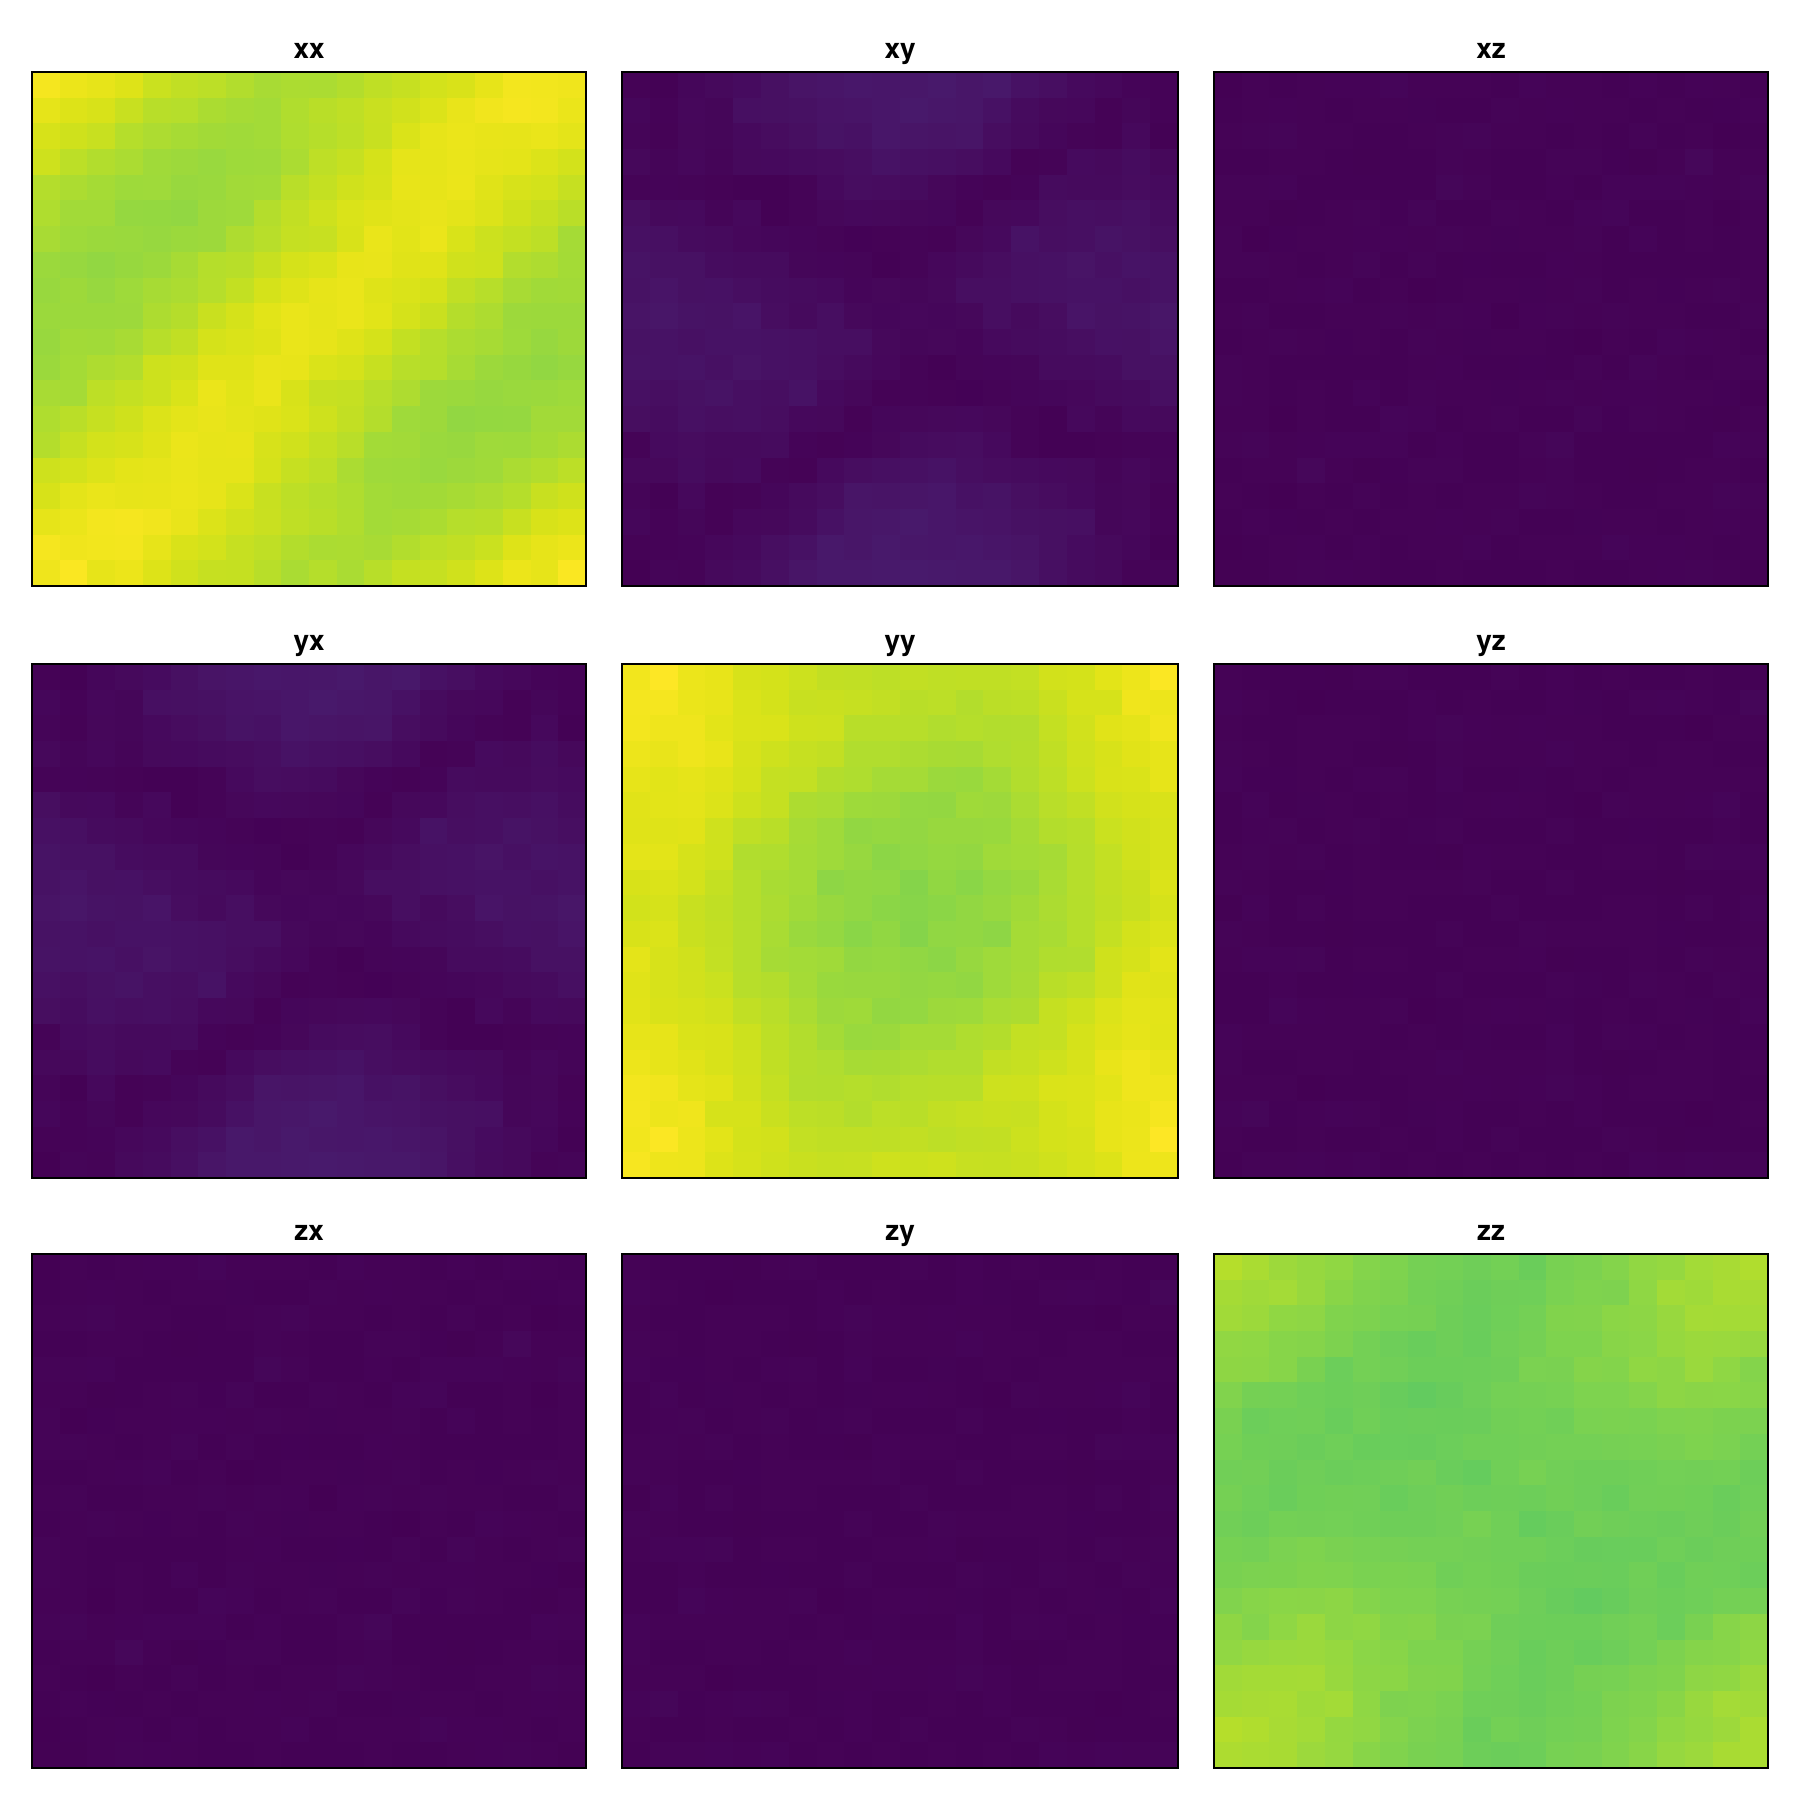

In [50]:
CairoMakie.activate!()

i = 1
fig = Figure(size=(900, 900))
labels = [:x, :y, :z]
scale = ReversibleScale(log)
corr_matrices = eachslice(etak_corrs[i], dims=(1, 2))
max_corrs = maximum(abs.(etak_corrs[i]))
for x in 1:3
    for y in 1:3
        fig[x, y] = ax = Axis(fig, title="$(labels[x])$(labels[y])")
        corrs = getindex.(corr_matrices, x, y)
        heatmap!(ax, getfield.(abs.(corrs), :val), colorrange=(0, max_corrs.val))
        hidedecorations!(ax)
    end
end

print("Maximum correlation norm: $max_corrs")
fig

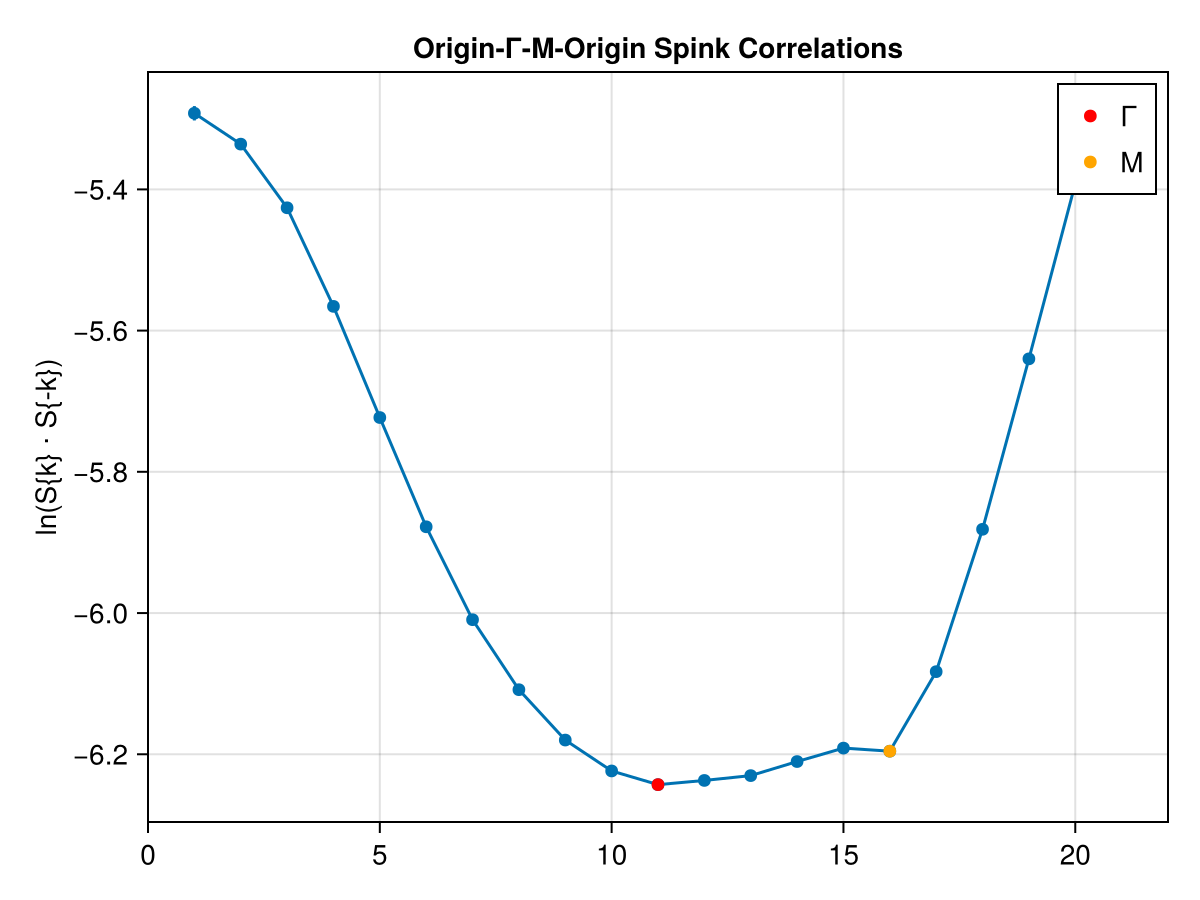

In [51]:
CairoMakie.activate!()
task_no = 10
Lx, Ly = size(spink_corrs[task_no])
borderx = div(Lx, 2) + 1
bordery = div(Ly, 2) + 1

Γ_path = [(i, 1) for i in 1:borderx]
M_path = [(borderx, i) for i in 2:(div(bordery, 2) + 1)]
O_path = [(borderx - 2i, div(bordery, 2) - i + 1) for i in 1:div(borderx, 2)]
path = cat(Γ_path, M_path, O_path, dims=1)

Γ_pos = length(Γ_path)
M_pos = length(Γ_path) + length(M_path)
corrs = [spink_corrs[task_no][I...] for I in path]

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Origin-Γ-M-Origin Spink Correlations",
    ylabel="ln(S{k} ⋅ S{-k})"
)
log_corrs = log.(corrs)
scatter!(ax, log_corrs)
errorbars!(ax, 1:length(path), getfield.(log_corrs, :val), getfield.(log_corrs, :err))
lines!(ax, log_corrs)
scatter!(ax, Γ_pos, log(corrs[Γ_pos].val), color=:red, label="Γ")
scatter!(ax, M_pos, log(corrs[M_pos].val), color=:orange, label="M")
axislegend()
fig

In [52]:
to_triangle((x, y)) = ((x-1), (-(x-1) + 2(y-1)) / sqrt(3)) ./ 20
positions = to_triangle.(Iterators.product(axes(getfield.(spink_corrs[1], :val))...))

20×20 Matrix{Tuple{Float64, Float64}}:
 (0.0, 0.0)          …  (0.0, 1.03923)    (0.0, 1.09697)
 (0.05, -0.0288675)     (0.05, 1.01036)   (0.05, 1.0681)
 (0.1, -0.057735)       (0.1, 0.981495)   (0.1, 1.03923)
 (0.15, -0.0866025)     (0.15, 0.952628)  (0.15, 1.01036)
 (0.2, -0.11547)        (0.2, 0.92376)    (0.2, 0.981495)
 (0.25, -0.144338)   …  (0.25, 0.894893)  (0.25, 0.952628)
 (0.3, -0.173205)       (0.3, 0.866025)   (0.3, 0.92376)
 (0.35, -0.202073)      (0.35, 0.837158)  (0.35, 0.894893)
 (0.4, -0.23094)        (0.4, 0.80829)    (0.4, 0.866025)
 (0.45, -0.259808)      (0.45, 0.779423)  (0.45, 0.837158)
 (0.5, -0.288675)    …  (0.5, 0.750555)   (0.5, 0.80829)
 (0.55, -0.317543)      (0.55, 0.721688)  (0.55, 0.779423)
 (0.6, -0.34641)        (0.6, 0.69282)    (0.6, 0.750555)
 (0.65, -0.375278)      (0.65, 0.663953)  (0.65, 0.721688)
 (0.7, -0.404145)       (0.7, 0.635085)   (0.7, 0.69282)
 (0.75, -0.433013)   …  (0.75, 0.606218)  (0.75, 0.663953)
 (0.8, -0.46188)        (0.8, 0.5

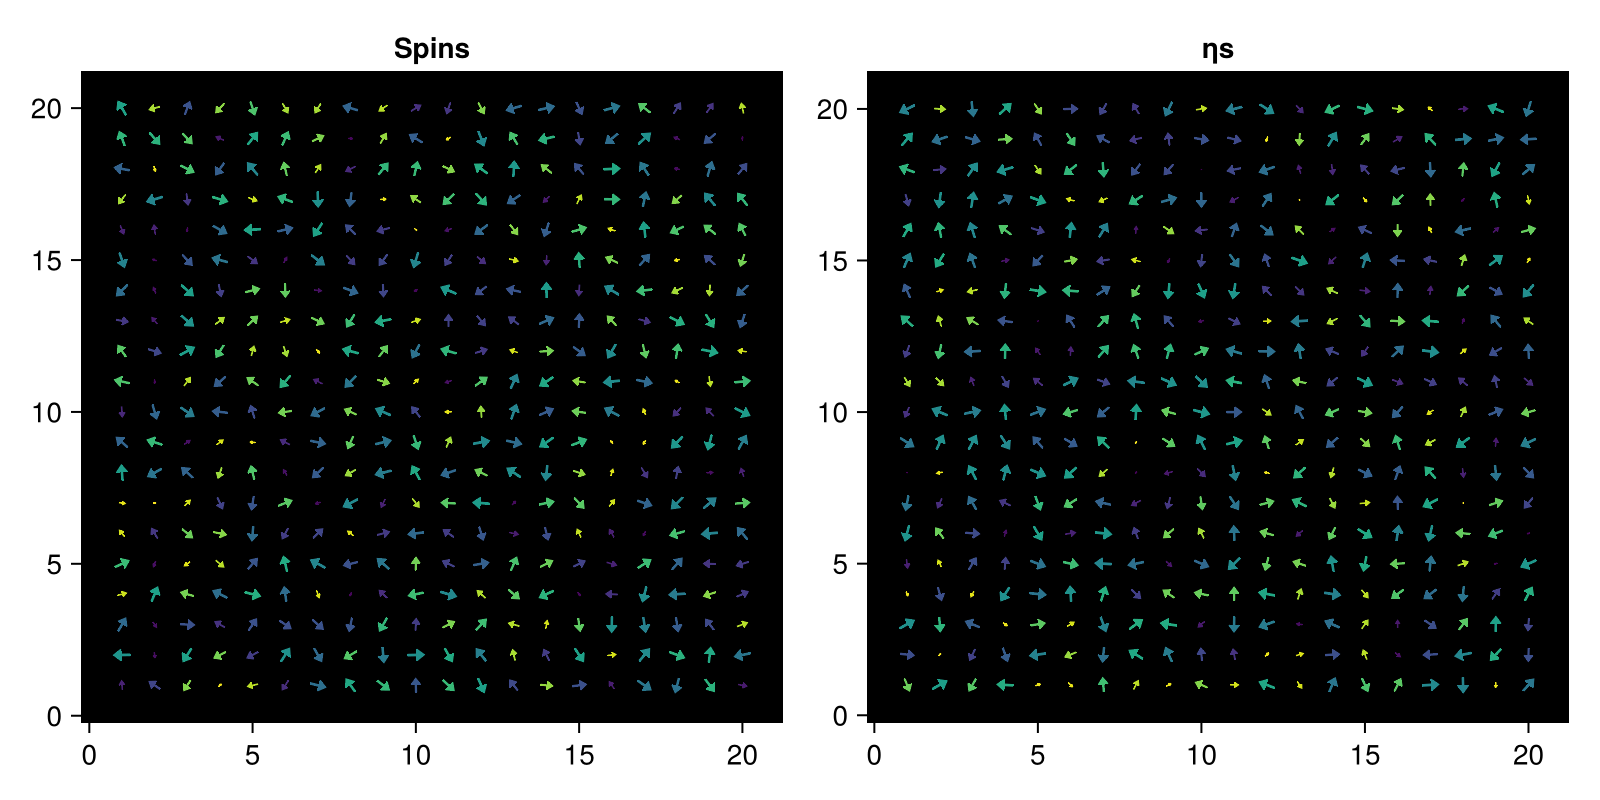

In [53]:
generate_spins("stripe-anneal", 1)